**Load the dataset :**

In [1]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
x, y = housing.data, housing.target
print(x.shape, y.shape)

(20640, 8) (20640,)


**Train-Test split :**

In [2]:
from sklearn.model_selection import train_test_split
x_trian,x_test,y_train,y_test = train_test_split(x,y,test_size=.2,random_state=20)

**1.Data Preprocessing Using StandardScaler :**



In [34]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_trianStdS = sc.fit_transform(x_trian)
x_testStdS = sc.transform(x_test)



*   **Analytical / Normal Equation :**



 Compute regression coefficients :


In [35]:
import numpy as np
X_train_b = np.c_[np.ones((x_trianStdS.shape[0], 1)), x_trianStdS]
X_test_b  = np.c_[np.ones((x_testStdS.shape[0], 1)), x_testStdS]
w = np.linalg.inv(X_train_b.T @ X_train_b) @ X_train_b.T @ y_train
y_pred_train = X_train_b @ w
y_pred_test  = X_test_b @ w

Function to compute Mean Squared Error :

In [36]:
def RMSE(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

Compute RMSE for test & train :

In [37]:
RMSE_train = RMSE(y_train, y_pred_train)
RMSE_test  = RMSE(y_test,  y_pred_test)
print("RMSE_train:", RMSE_train)
print("RMSE_test:", RMSE_test)

RMSE_train: 0.7216515999034232
RMSE_test: 0.7355308130245343




*   **Gradient Descent :**



In [38]:
def h_w(x, w):
    return w[0] + w[1]*x

 Gradient Descent iterations & learning rates:


In [40]:
epochs = 500
alphas = [0.0001 ,0.001, 0.01, 0.05, 0.1,0.5,0.8,0.9,1]
n_train = len(x_trianStdS)
n_test=len(x_testStdS)

compute RMSE for different alphas :


In [41]:
n_features = x_trianStdS.shape[1]
rmse_train_dict = {}
rmse_test_dict  = {}
for alpha in alphas:
    w = np.zeros(n_features + 1)
    rmse_train_list = []
    rmse_test_list  = []
    for i in range(epochs):
        y_pred_train = w[0] + x_trianStdS @ w[1:]
        y_pred_test  = w[0] + x_testStdS @ w[1:]
        rmse_train_list.append(RMSE(y_train, y_pred_train))
        rmse_test_list.append(RMSE(y_test, y_pred_test))
        Gw0 = np.sum(y_pred_train - y_train) / n_train
        Gw_rest = (x_trianStdS.T @ (y_pred_train - y_train)) / n_train
        w[0] -= alpha * Gw0
        w[1:] -= alpha * Gw_rest
    rmse_train_dict[alpha] = rmse_train_list
    rmse_test_dict[alpha]  = rmse_test_list


plot RMSE vs learning rate to find best alpha :

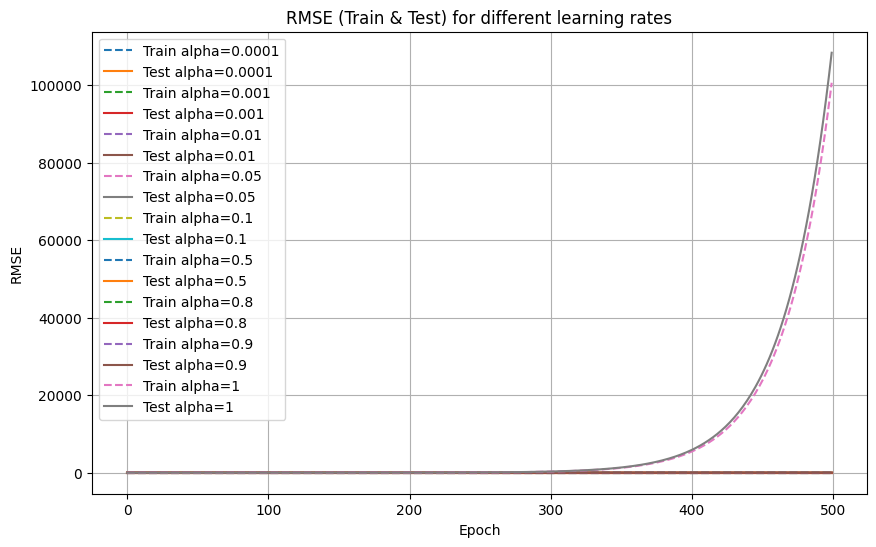

In [42]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
for alpha in alphas:
    plt.plot(range(epochs), rmse_train_dict[alpha], '--', label=f'Train alpha={alpha}')
    plt.plot(range(epochs), rmse_test_dict[alpha], '-',  label=f'Test alpha={alpha}')
plt.xlabel("Epoch")
plt.ylabel("RMSE")
plt.title("RMSE (Train & Test) for different learning rates")
plt.legend()
plt.grid(True)
plt.show()

plot RMSE for different alpha to find best alpha :

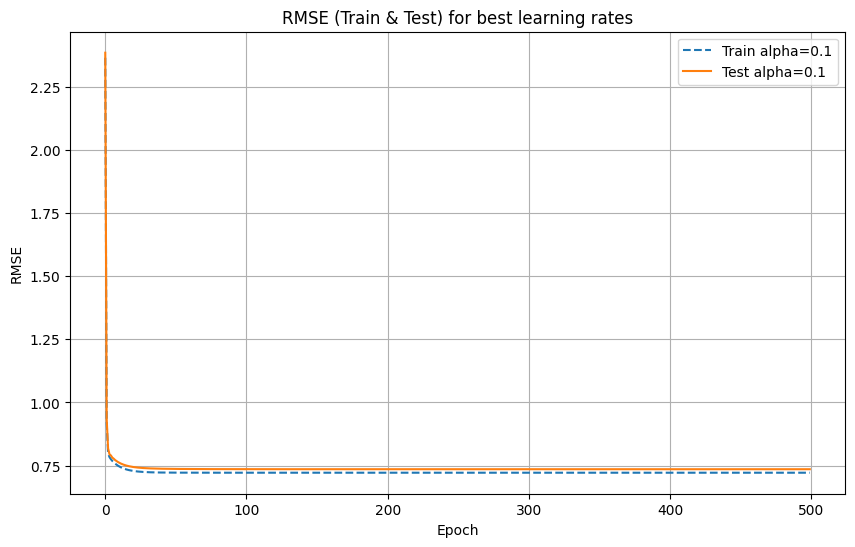

In [43]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
alpha=0.8
plt.plot(range(epochs), rmse_train_dict[alpha], '--', label=f'Train alpha={0.1}')
plt.plot(range(epochs), rmse_test_dict[alpha], '-',  label=f'Test alpha={0.1}')
plt.xlabel("Epoch")
plt.ylabel("RMSE")
plt.title("RMSE (Train & Test) for best learning rates")
plt.legend()
plt.grid(True)
plt.show()

2.**1.Data Preprocessing Using MinMax :**


In [46]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_trian_minmax = scaler.fit_transform(x_trian)
x_test_minmax  = scaler.transform(x_test)

*   **Analytical / Normal Equation :**

 Compute regression coefficients :


In [48]:
import numpy as np
X_train_b = np.c_[np.ones((x_trian_minmax.shape[0], 1)), x_trian_minmax]
X_test_b  = np.c_[np.ones((x_test_minmax.shape[0], 1)), x_test_minmax]
w = np.linalg.inv(X_train_b.T @ X_train_b) @ X_train_b.T @ y_train
y_pred_train = X_train_b @ w
y_pred_test  = X_test_b @ w

Function to compute Mean Squared Error :

In [49]:
def RMSE(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

Compute RMSE for test & train :

In [50]:
RMSE_train = RMSE(y_train, y_pred_train)
RMSE_test  = RMSE(y_test,  y_pred_test)
print("RMSE_train:", RMSE_train)
print("RMSE_test:", RMSE_test)

RMSE_train: 0.7216515999034234
RMSE_test: 0.7355308130245263




*   **Gradient Descent :**



In [51]:
def h_w(x, w):
    return w[0] + w[1]*x

 Gradient Descent iterations & learning rates:


In [52]:
epochs = 500
alphas = [0.0001 ,0.001, 0.01, 0.05, 0.1,0.5,0.8,0.9,1]
n_train = len(x_trian_minmax)
n_test=len(x_test_minmax)


compute RMSE for different alphas :


In [54]:
n_features = x_trian_minmax.shape[1]
rmse_train_dict = {}
rmse_test_dict  = {}
for alpha in alphas:
    w = np.zeros(n_features + 1)
    rmse_train_list = []
    rmse_test_list  = []
    for i in range(epochs):
        y_pred_train = w[0] + x_trian_minmax @ w[1:]
        y_pred_test  = w[0] + x_test_minmax @ w[1:]
        rmse_train_list.append(RMSE(y_train, y_pred_train))
        rmse_test_list.append(RMSE(y_test, y_pred_test))
        Gw0 = np.sum(y_pred_train - y_train) / n_train
        Gw_rest = (x_trian_minmax.T @ (y_pred_train - y_train)) / n_train
        w[0] -= alpha * Gw0
        w[1:] -= alpha * Gw_rest
    rmse_train_dict[alpha] = rmse_train_list
    rmse_test_dict[alpha]  = rmse_test_list


plot RMSE vs learning rate to find best alpha :

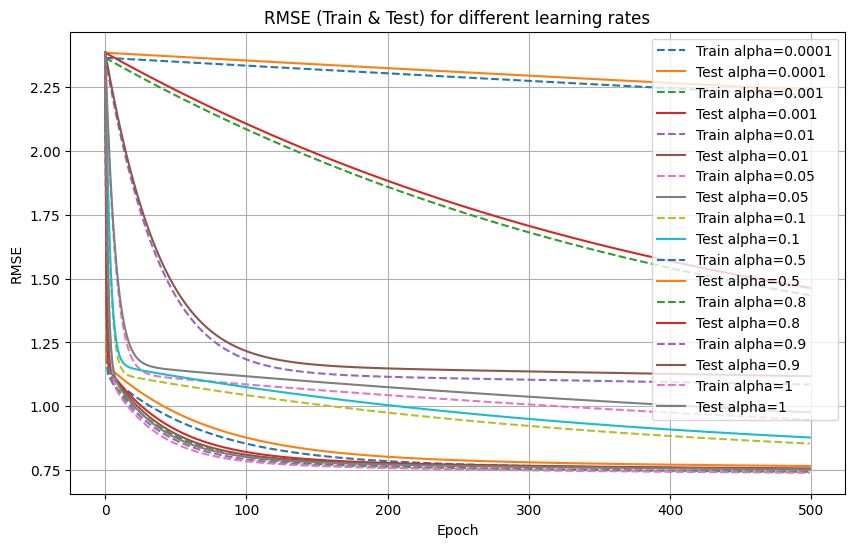

In [55]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
for alpha in alphas:
    plt.plot(range(epochs), rmse_train_dict[alpha], '--', label=f'Train alpha={alpha}')
    plt.plot(range(epochs), rmse_test_dict[alpha], '-',  label=f'Test alpha={alpha}')
plt.xlabel("Epoch")
plt.ylabel("RMSE")
plt.title("RMSE (Train & Test) for different learning rates")
plt.legend()
plt.grid(True)
plt.show()

plot RMSE for different alpha to find best alpha :

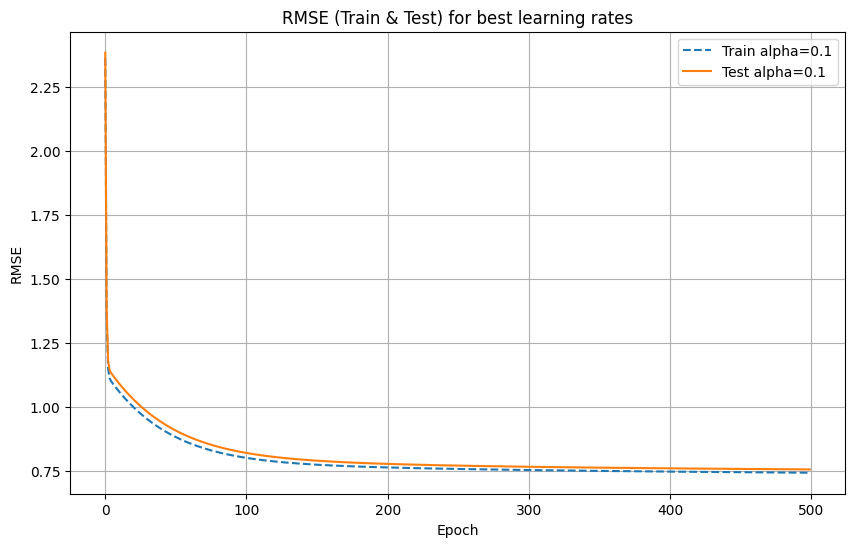

In [56]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
alpha=0.8
plt.plot(range(epochs), rmse_train_dict[alpha], '--', label=f'Train alpha={0.1}')
plt.plot(range(epochs), rmse_test_dict[alpha], '-',  label=f'Test alpha={0.1}')
plt.xlabel("Epoch")
plt.ylabel("RMSE")
plt.title("RMSE (Train & Test) for best learning rates")
plt.legend()
plt.grid(True)
plt.show()

# Extra Bonus
# Batch Gradient Descent with MinMaxScaler Preprocessing
* Calculation of mean squared error on training and testing data
* Plotting MSE vs alpha at constant epoch
* Plotting MSE vs Epochs at best alpha

In [57]:
# function Batch Gradient Descent
import numpy as np
import matplotlib.pyplot as plt

def batch_gradient_descent(x, y, alpha, epochs):
    m, n = x.shape
    theta = np.zeros(n)
    mse_history = []

    for epoch in range(epochs):
        y_pred = x.dot(theta)
        error = y_pred - y
        gradient = (1/m) * x.T.dot(error)
        theta -= alpha * gradient
        mse = np.mean(error**2)
        mse_history.append(mse)
    
    return theta, mse_history

#  BGD with MinMaxScaler
alpha = 0.01
epochs = 100
theta_bgd, mse_history_bgd = batch_gradient_descent(x_trian_minmax, y_train, alpha, epochs)

# Calculating error on training and testing data
from sklearn.metrics import mean_squared_error
y_pred_train = x_trian_minmax.dot(theta_bgd)
y_pred_test = x_test_minmax.dot(theta_bgd)
print("MSE (Train):", mean_squared_error(y_train, y_pred_train))
print("MSE (Test):", mean_squared_error(y_test, y_pred_test))


MSE (Train): 2.3119201501022224
MSE (Test): 2.3915454759750623


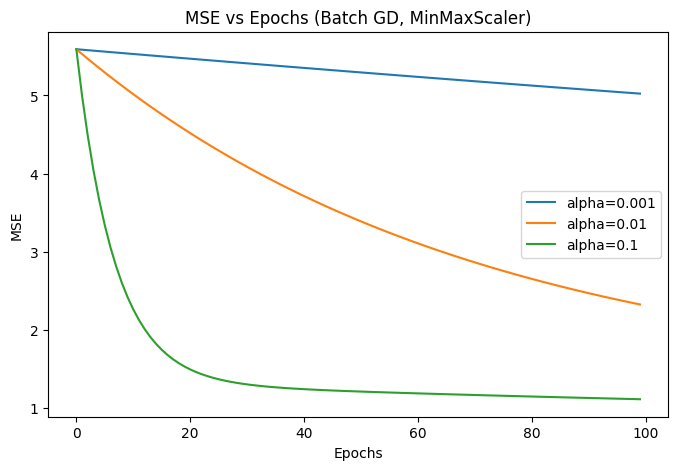

In [ ]:
# Examining the effect of alpha (learning rate) on MSE
alphas = [0.001, 0.01, 0.1]
epochs = 100
plt.figure(figsize=(8,5))

for a in alphas:
    _, mse_history = batch_gradient_descent(x_trian_minmax, y_train, a, epochs)
    plt.plot(range(epochs), mse_history, label=f"alpha={a}")

plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.title("MSE vs Epochs (Batch GD, MinMaxScaler)")
plt.legend()
plt.show()


# Batch Gradient Descent with StandardScaler PreProcessing
* Calculation of mean squared error on training and testing data
* Plotting MSE vs alpha at constant epoch
* Plotting MSE vs Epoch at best alpha


In [ ]:
# Running BGD with StandardScaler
alpha = 0.01
epochs = 100
theta_bgd_std, mse_history_bgd_std = batch_gradient_descent(x_trianStdS, y_train, alpha, epochs)

y_pred_train_std = x_trianStdS.dot(theta_bgd_std)
y_pred_test_std = x_testStdS.dot(theta_bgd_std)
print("MSE (Train, StandardScaler):", mean_squared_error(y_train, y_pred_train_std))
print("MSE (Test, StandardScaler):", mean_squared_error(y_test, y_pred_test_std))


MSE (Train, StandardScaler): 5.001213448209277
MSE (Test, StandardScaler): 5.056658226090575


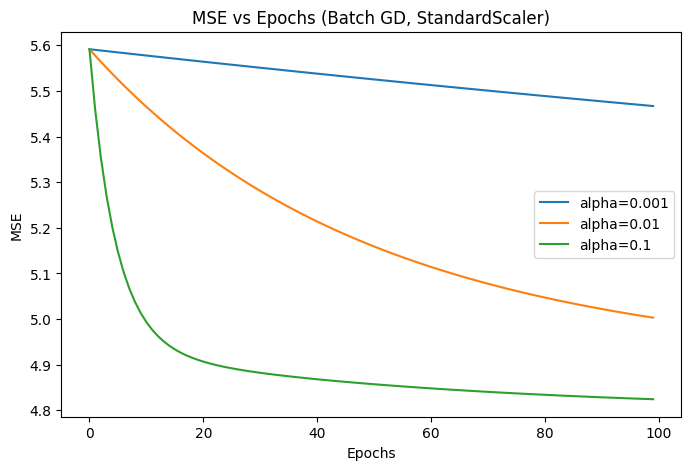

In [ ]:
# Checking the effect of alpha in StandardScaler mode
alphas = [0.001, 0.01, 0.1]
epochs = 100
plt.figure(figsize=(8,5))

for a in alphas:
    _, mse_history = batch_gradient_descent(x_trianStdS, y_train, a, epochs)
    plt.plot(range(epochs), mse_history, label=f"alpha={a}")

plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.title("MSE vs Epochs (Batch GD, StandardScaler)")
plt.legend()
plt.show()


# Mini-Batch Gradient Descent with StandardScaler Preprocessing
* Calculating MSE on Training and Testing Data
* Plotting MSE vs K(batch_size)


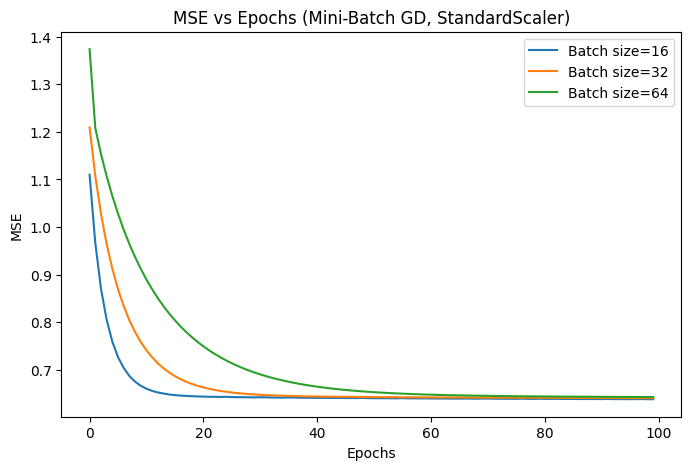

In [ ]:
# function Mini-Batch Gradient Descent
def mini_batch_gradient_descent(x, y, alpha, epochs, batch_size):
    m, n = x.shape
    theta = np.zeros(n)
    mse_history = []

    for epoch in range(epochs):
        indices = np.random.permutation(m)
        x_shuffled = x[indices]
        y_shuffled = y[indices]
        for i in range(0, m, batch_size):
            xi = x_shuffled[i:i+batch_size]
            yi = y_shuffled[i:i+batch_size]
            y_pred = xi.dot(theta)
            error = y_pred - yi
            gradient = (1/batch_size) * xi.T.dot(error)
            theta -= alpha * gradient
        mse = np.mean((x.dot(theta) - y)**2)
        mse_history.append(mse)
    
    return theta, mse_history

#  Mini-Batch GD with various batch_size
batch_sizes = [16, 32, 64]
alpha = 0.01
epochs = 100

plt.figure(figsize=(8,5))
for b in batch_sizes:
    _, mse_history_mb = mini_batch_gradient_descent(x_trian, y_train, alpha, epochs, b)
    plt.plot(range(epochs), mse_history_mb, label=f"Batch size={b}")

plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.title("MSE vs Epochs (Mini-Batch GD, StandardScaler)")
plt.legend()
plt.show()
